In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

df=pd.read_pickle('rterg_summary.pkl')

# fixes now implemented in main code
df=df.rename(columns={"Lat.":"Lat", "Long.":"Long","Ehf/Tr^3":"Ehf_Tr3"})
#df["Eventname"] = str(int(df["Eventname"])).zfill(8)   # convert to string with leading zeros
#df["iMag"]=pd.to_numeric(df["iMag"], errors='coerce', downcast='float')   # to float (was str)
#df.head(2)


#Create subset
#df6p5=df[df["Me"] >= 5.5]
df = df[df["Me"] >= 5.5]
  
# resetting the DatFrame index 
df = df.reset_index() 

df.tail(10)


,index,Eventname,oTime,Lat,Long,Depth,Me,Txo,Ehf,Ebb,...,Ehf_Tr3,Nstats,iMagType,SRC,iMag,TACER_HF,TACER_BB,Comment,mTime,iteration
3692,5005,21030608,2021-03-06 12:12:04+00:00,-28.91,-176.85,10.0,5.94,71,9.700000e+11,1.800000e+13,...,2.700000e+06,32,M,US,5.7,17,46,NaN,2021-03-06 12:53:37+00:00,6
3693,5006,21030609,2021-03-06 13:12:05+00:00,-28.30,-177.65,10.0,6.40,67,2.200000e+13,8.900000e+13,...,7.200000e+07,50,M,US,6.0,25,27,NaN,2021-03-06 13:45:11+00:00,6
3694,5007,21030610,2021-03-06 18:18:34+00:00,21.10,144.47,13.0,5.65,60,2.400000e+12,6.700000e+12,...,1.100000e+07,56,M,US,5.5,24,25,NaN,2021-03-06 18:54:32+00:00,6
3695,5008,21030611,2021-03-06 18:51:13+00:00,20.89,144.32,10.0,5.60,81,1.600000e+12,5.700000e+12,...,2.900000e+06,48,M,US,5.7,20,21,NaN,2021-03-06 19:26:02+00:00,6
3696,5009,21030700,2021-03-07 04:10:26+00:00,-29.22,-176.54,10.0,5.54,80,2.000000e+12,4.600000e+12,...,4.000000e+06,32,M,US,5.5,17.5,32,NaN,2021-03-07 04:40:25+00:00,6
3697,5010,21030701,2021-03-07 04:53:59+00:00,-37.18,179.63,10.0,5.68,68,3.700000e+12,7.600000e+12,...,1.200000e+07,39,M,US,5.5,37,37,NaN,2021-03-07 05:23:04+00:00,6
3698,5011,21030702,2021-03-07 19:28:47+00:00,-28.54,-177.01,10.0,5.54,84,2.100000e+12,4.600000e+12,...,3.500000e+06,37,M,US,5.5,27,31,NaN,2021-03-07 20:00:42+00:00,6
3699,5012,21030703,2021-03-07 23:56:56+00:00,-29.60,-177.03,10.0,5.88,65,8.600000e+12,1.500000e+13,...,3.200000e+07,46,M,US,5.6,34.5,34,NaN,2021-03-08 00:33:27+00:00,6
3700,5014,21031000,2021-03-10 20:12:37+00:00,-20.13,-177.67,488.0,6.25,89,3.400000e+13,5.300000e+13,...,4.800000e+07,57,M,US,5.8,12,12,NaN,2021-03-10 20:46:15+00:00,6
3701,5015,09021102,2009-02-11 17:34:54+00:00,3.82,126.84,54.0,7.25,55,4.100000e+14,1.700000e+15,...,2.500000e+09,66,Mo,AT,7.4,NaN,NaN,NaN,2009-02-11 18:08:08+00:00,A


In [49]:
print(df.shape[0])
df.oTime[0].year


3702


2000

In [60]:
# Add event webpage to dataframe
web_url =[]
year = []
month = []
for i in range(df.shape[0]):
    yr = str(df.oTime[i].year)
    mo = str(df.oTime[i].month)
    event = str(df.Eventname[i])
    webpage ='http://geophysics.eas.gatech.edu/anewman/research/RTerg/'+yr+'/'+event+'/'#<a href=”http://geophysics.eas.gatech.edu/RTerg/”>GT RTerg</a>
    #w = <a href=”webpage”</a>
    web_url.append(w)
    year.append(yr)
    month.append(mo)
df['Event_url'] = web_url
df['yr'] = year
df['mo'] = month
df

,index,Eventname,oTime,Lat,Long,Depth,Me,Txo,Ehf,Ebb,...,iMag,TACER_HF,TACER_BB,Comment,mTime,iteration,Event_url,sMe,yr,mo
0,0,00010500,2000-01-05 07:40:40+00:00,-11.27,165.25,15.0,6.28,83,1.300000e+13,5.900000e+13,...,6.0,NaN,NaN,Solomon Islands : IRIS Fetched Data,2016-12-06 22:55:40+00:00,A,<a href=”webpage”</a>,0.016384,2000,1
1,1,00010800,2000-01-08 01:19:46+00:00,-9.78,159.99,15.0,6.32,78,1.500000e+13,6.800000e+13,...,6.4,NaN,NaN,Solomon Islands : IRIS Fetched Data,2016-12-06 23:28:08+00:00,A,<a href=”webpage”</a>,0.017424,2000,1
2,3,00051699,1999-05-16 00:51:20+00:00,-4.99,152.76,42.0,6.93,90,1.900000e+14,5.600000e+14,...,7.0,NaN,NaN,Solomon Islands : IRIS Fetched Data | 1999,2016-12-08 17:45:51+00:00,A,<a href=”webpage”</a>,0.037249,1999,5
3,6,00111601,2000-11-16 07:42:16+00:00,-5.03,153.17,31.2,7.45,101,8.200000e+14,3.400000e+15,...,7.8,NaN,NaN,Solomon Islands : IRIS Fetched Data,2016-12-08 17:39:07+00:00,A,<a href=”webpage”</a>,0.060025,2000,11
4,7,00111700,2000-11-17 21:01:56+00:00,-5.26,152.34,17.0,7.13,107,2.800000e+14,1.100000e+15,...,7.8,NaN,NaN,Solomon Islands : IRIS Fetched Data,2016-12-08 17:29:53+00:00,A,<a href=”webpage”</a>,0.045369,2000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,5010,21030701,2021-03-07 04:53:59+00:00,-37.18,179.63,10.0,5.68,68,3.700000e+12,7.600000e+12,...,5.5,37,37,NaN,2021-03-07 05:23:04+00:00,6,<a href=”webpage”</a>,0.004624,2021,3
3698,5011,21030702,2021-03-07 19:28:47+00:00,-28.54,-177.01,10.0,5.54,84,2.100000e+12,4.600000e+12,...,5.5,27,31,NaN,2021-03-07 20:00:42+00:00,6,<a href=”webpage”</a>,0.002916,2021,3
3699,5012,21030703,2021-03-07 23:56:56+00:00,-29.60,-177.03,10.0,5.88,65,8.600000e+12,1.500000e+13,...,5.6,34.5,34,NaN,2021-03-08 00:33:27+00:00,6,<a href=”webpage”</a>,0.007744,2021,3
3700,5014,21031000,2021-03-10 20:12:37+00:00,-20.13,-177.67,488.0,6.25,89,3.400000e+13,5.300000e+13,...,5.8,12,12,NaN,2021-03-10 20:46:15+00:00,6,<a href=”webpage”</a>,0.015625,2021,3


In [62]:
#find number of years in dataframe and list
years = list(df['yr'].unique().tolist())
months = list(df['mo'].unique().tolist())

# Resize so plots are larger

In [51]:
import matplotlib 
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
matplotlib.rcParams['figure.figsize'] = [10,10]

## Geographic plot of data


## using basemap (deprecated tool that we may not use here going forward)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


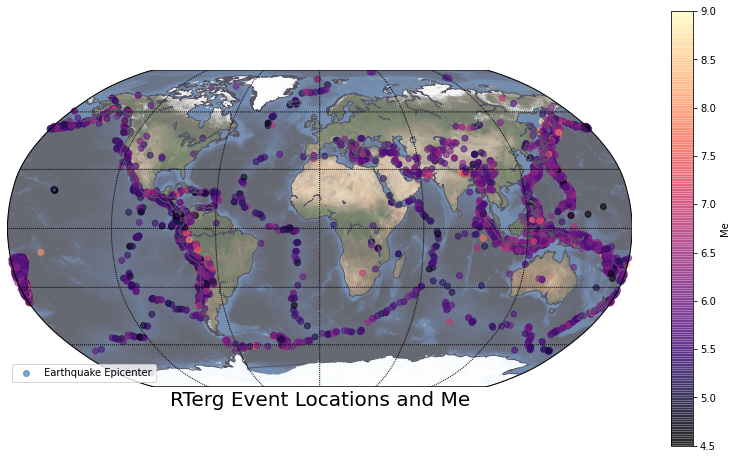

In [16]:
from mpl_toolkits.basemap import Basemap
import scipy.stats as stats
cm = plt.cm.get_cmap('magma')
plt.figure(figsize=(14, 8))
earth = Basemap(projection='robin',lon_0=0)
earth.drawparallels(np.arange(-90.,120.,30.))
earth.drawmeridians(np.arange(0.,360.,60.))
earth.bluemarble(alpha=0.60)
earth.drawcoastlines(color='#555566', linewidth=1)
x,y = earth(np.array(df.Long),np.array(df.Lat))
Me = np.array(df.Me)
sc = plt.scatter(x,y,c=Me,cmap=cm,alpha=.6,vmin=4.5, vmax=9,label='Earthquake Epicenter')
plt.colorbar(sc,label="Me")
plt.legend(loc='lower left')
plt.xlabel("RTerg Event Locations and Me", fontsize=20)
plt.show();

In [72]:
#Group_by_station = df.groupby(['sta','sta_lat','sta_lon']).size().reset_index(name='phase_count')
#colorbar should be energy by duration cubed :)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
# scale mags
mmin=5.0
sMe=((df['Me']-mmin)/10)**2
df['sMe'] = sMe


cm = plt.cm.get_cmap('viridis')
#interact(f, x=(0.0,10.0))
cpoint =dict([ ('lat',0), ('lon',0) ])  # weird things when I recenter on +/-180
fig = px.scatter_geo(df,lat='Lat',lon='Long',projection="natural earth",color='Depth', 
                     center= cpoint, size='sMe')
fig.update_layout(title='RTerg Event Locations and iMag Source: <a href=”http://geophysics.eas.gatech.edu/RTerg/”>GT RTerg</a> ')
fig.update_layout(width=800)
fig.update_coloraxes(colorscale='jet')

fig.show()

In [54]:
#Group_by_station = df.groupby(['sta','sta_lat','sta_lon']).size().reset_index(name='phase_count')
#colorbar should be energy by duration cubed :)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
# scale mags
mmin=5.0
sMe=((df['Me']-mmin)/10)**2
df['sMe'] = sMe


cm = plt.cm.get_cmap('viridis')
#interact(df.df6p5, x=(0.0,10.0))
cpoint =dict([ ('lat',0), ('lon',0) ])  # weird things when I recenter on +/-180
fig = px.scatter_geo(df,lat='Lat',lon='Long',projection="natural earth",color='Ehf_Tr3', 
                     center= cpoint, size='sMe',hover_data=['Event_url'])
fig.update_layout(title='RTerg Event Locations and iMag Source: <a href=”http://geophysics.eas.gatech.edu/RTerg/”>GT RTerg</a> ')
fig.update_layout(width=800)
fig.update_coloraxes(colorscale='jet')

fig.show()

In [68]:
#Now add dropdowns
#Group_by_station = df.groupby(['sta','sta_lat','sta_lon']).size().reset_index(name='phase_count')
#colorbar should be energy by duration cubed :)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
# scale mags
mmin=5.0
sMe=((df['Me']-mmin)/10)**2
df['sMe'] = sMe


cm = plt.cm.get_cmap('viridis')
#interact(df.df6p5, x=(0.0,10.0))
cpoint =dict([ ('lat',0), ('lon',0) ])  # weird things when I recenter on +/-180
trace1 = px.scatter_geo(df,lat='Lat',lon='Long',projection="natural earth",color='Ehf_Tr3', 
                     center= cpoint, size='sMe',hover_data=['Event_url'])
fig = go.FigureWidget(trace1)
# Create all our drop down widgets
filterDrop = widgets.Dropdown(
    description='Filter:',
    value='yr',
    options=['yr', 'mo']  
)
yearDrop1 = widgets.Dropdown(
    description='Team Name:',
    value='2020',
    options=years 
)
# This will be called when the filter dropdown changes. 
def filterResponse(change):
    # generate the new traces that are filtered by year or month
    tempTrace = px.scatter_geo(df,lat='Lat',lon='Long',projection="natural earth", 
                     center= cpoint, size='sMe',hover_data=['Event_url'], color=filterDrop.value)
    with fig.batch_update():
        # Delete the old traces and add the new traces in one at a time
        fig.data = []
        for tr in tempTrace.data:
            fig.add_scatter(x = tr.x, y = tr.y, hoverlabel = tr.hoverlabel, hovertemplate = tr.hovertemplate, \
                           legendgroup = tr.legendgroup, marker = tr.marker, mode = tr.mode, name = tr.name)
    # Call response so that it will color the markers appropriately
    response(change)
yearDrop1.observe(filterResponse, names="value")
container1 = widgets.HBox([filterDrop]) 
widgets.VBox([container1, fig])
fig.update_layout(title='RTerg Event Locations and iMag Source: <a href=”http://geophysics.eas.gatech.edu/RTerg/”>GT RTerg</a> ')
fig.update_layout(width=800)
fig.update_coloraxes(colorscale='magma')

fig.show()

In [17]:
import plotly.io as pio
pio.write_html(fig, file='index.html', auto_open=True)

In [15]:
import chart_studio.tools as tls

tls.get_embed('***url')

ModuleNotFoundError: No module named 'chart_studio'

In [20]:
# weird things when I recenter on +/-180
fig = px.scatter_geo(df6p5,lat='Lat',lon='Long')
fig.update_layout(title='RTerg Event Locations and iMag')
fig.update_layout(mapbox_style="open-street-map") 
fig.show()